In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Importando o dataset e realizando uma visualização inicial

In [2]:
winequality_dataset = pd.read_csv("winequality.csv")
winequality_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  wine_is_red           6497 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 710.7 KB


Realizando uma análise um pouco mais detalhada a cerca de como os dados e como eles estão distribuidos

In [3]:
winequality_dataset.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,3248.000000,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1875.666681,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,1624.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,3248.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,4872.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,6496.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


<Axes: >

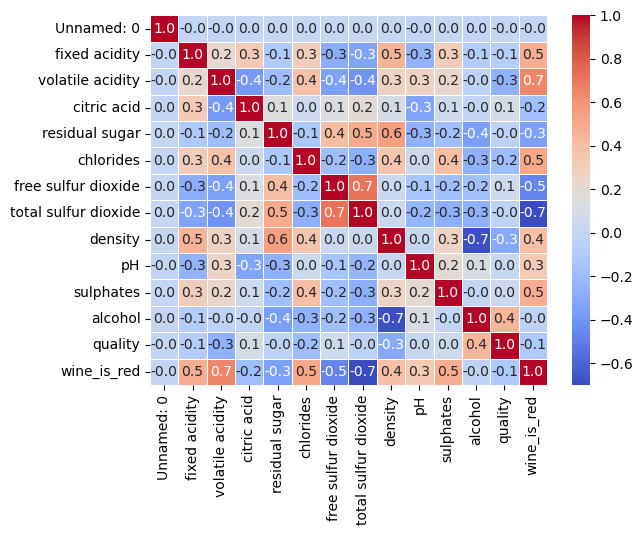

In [4]:
#Entender a correlação entre os dados
correlação = winequality_dataset.corr()
sns.heatmap(correlação, annot = True, fmt=".1f", cmap='coolwarm', linewidths=.6)

In [5]:
#Verificar quantos vinhos são classificados em cada rótulo de qualidade
quantidade = {}
for i in winequality_dataset['quality']:
    if i not in quantidade:
        quantidade[i] = 1
    else:
        quantidade[i] +=1

for i in sorted(quantidade, key = quantidade.get):
    print(i, quantidade[i])

9 5
3 30
8 193
4 216
7 1079
5 2138
6 2836


Limpeza do dataset

In [6]:
#Remove a coluna chamada "Unnamed: 0".
winequality_dataset.drop('Unnamed: 0', axis=1, inplace=True)
#Substituindo os espaços entre as palavras do cabeçalho pelo underline.
winequality_dataset.columns = winequality_dataset.columns.str.replace(" ", "_")

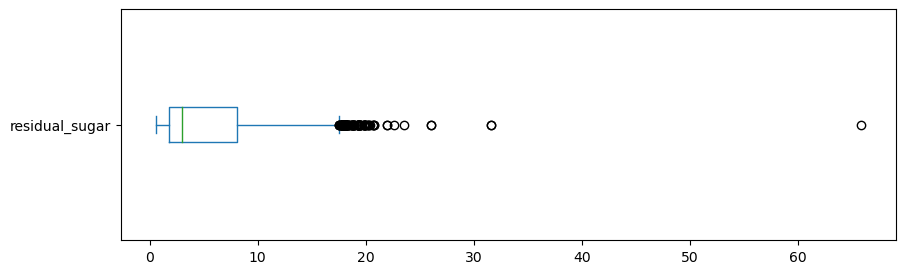

In [7]:
#Plotagem de um gráfico simples para analisar melhor a coluna residual_sugar.
winequality_dataset.residual_sugar.plot(kind='box', vert=False, figsize=(10,3))
#Remove os casos que possuem valores maiores que 25 (só há três valores maiores)
winequality_dataset.drop(winequality_dataset[winequality_dataset.residual_sugar > 25].index, axis=0, inplace=True)

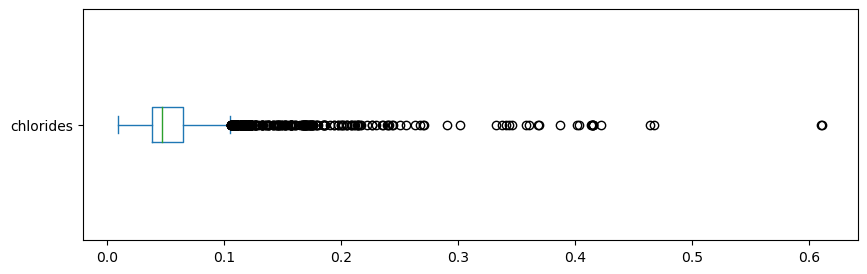

In [8]:
#Plotagem de um gráfico simples para analisar melhor a coluna chlorides.
winequality_dataset.chlorides.plot(kind='box', vert=False, figsize=(10,3))
#Remove os casos que possuem valores maiores que 0.3
winequality_dataset.drop(winequality_dataset[winequality_dataset.chlorides > 0.3].index, axis=0, inplace=True)

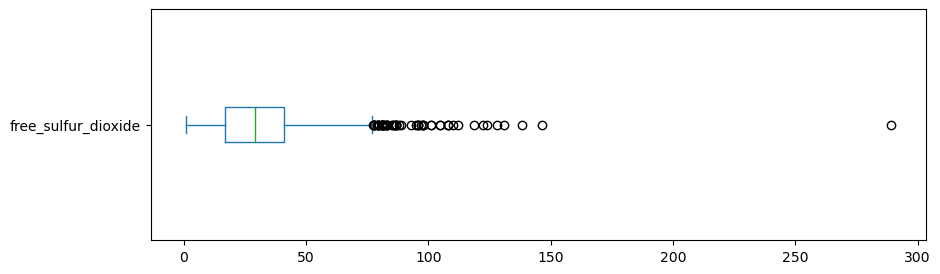

In [9]:
#Plotagem de um gráfico simples para analisar melhor a coluna free sulfur dioxide.
winequality_dataset.free_sulfur_dioxide.plot(kind='box', vert=False, figsize=(10,3))
#Remove os casos que possuem valores maiores que 150 (há apenas um)
winequality_dataset.drop(winequality_dataset[winequality_dataset.free_sulfur_dioxide > 120].index, axis=0, inplace=True)

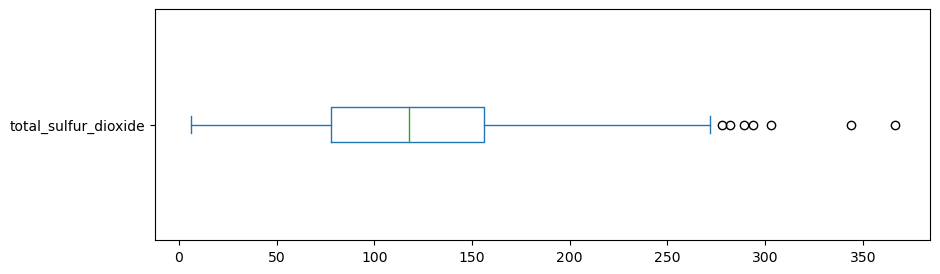

In [10]:
#Plotagem de um gráfico simples para analisar melhor a coluna total sulfur dioxide.
winequality_dataset.total_sulfur_dioxide.plot(kind='box', vert=False, figsize=(10,3))
#Remove os casos que possuem valores maiores que 275
winequality_dataset.drop(winequality_dataset[winequality_dataset.total_sulfur_dioxide > 275].index, axis=0, inplace=True)

Realizando uma classificação binária com o algoritmo de KNN feito com numpy (tinto ou não)

In [11]:
#Separação do dataset
x = winequality_dataset.iloc[:, 0:11]
qualidade = winequality_dataset.iloc[:, 11]
y = winequality_dataset.iloc[:, 12]

x_treinamento, x_teste, y_treinamento, y_teste, qual_treinamento, qual_teste = train_test_split(x, y, qualidade, random_state=0, test_size=0.2)

In [12]:
#Verificando o valor de K ideal
import math
math.sqrt(len(x_treinamento))

71.85401867675878

In [13]:
#Função para calcular o KNN
from collections import Counter

#Distancia
def calcula_distancia(ponto1, ponto2):
    distancia = np.sqrt(np.sum((ponto1-ponto2)**2))
    return distancia
 
#Função para calcular o KNN
def predict(x_train, y_train , x_test, y_test, k):
    rotulos_y_test = []
    #Loop atraves dos pontos que precisam ser classificados
    for ponto_teste in x_test: 
        #Lista para armazenar as distancias
        point_dist = []
        #Loop atravesando cada dado do treinado
        for ponto_treino in range(len(x_train)): 
            #Calcula distancia
            distances = calcula_distancia(np.array(x_train[ponto_treino,:]), ponto_teste) 
            #Armazena as distancias na lista
            point_dist.append(distances) 

        dataframe_distancias = pd.DataFrame(data=point_dist, columns=['dist'], index=y_train.index)

        #Ordena as distancias e considera apenas as K pontos mais próximos 
        dataframe_ordenado = dataframe_distancias.sort_values(by=['dist'], axis=0)[:k]
         
        #Rastreia qual o rótulo dos K objetos mais próximos
        counter = Counter(y_train[dataframe_ordenado.index])
         
        #Pega o rótulo mais comum de todos os K vizinhos mais próximos
        prediction = counter.most_common()[0][0]
        rotulos_y_test.append(prediction)
        
    return rotulos_y_test

In [14]:
#Normalizando o dataset
normaliza = StandardScaler()

x_treinamento = normaliza.fit_transform(x_treinamento)
x_teste = normaliza.transform(x_teste)

Acurácia: 99.4%
Precisão: 99.1%
Recall: 98.4%


<Axes: >

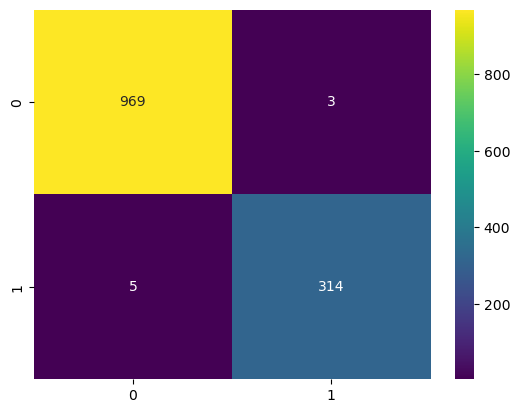

In [15]:
#Realiza a predição após a normalização dos dados
y_pred = predict(x_treinamento, y_treinamento, x_teste, y_teste, 71)

#Realiza o teste de acurácia
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
print(f'Acurácia: {(accuracy_score(y_teste, y_pred)*100):.1f}%')
print(f'Precisão: {(precision_score(y_teste, y_pred)*100):.1f}%')
print(f'Recall: {(recall_score(y_teste, y_pred)*100):.1f}%')

#Cria uma matriz de confusão
matriz = confusion_matrix(y_teste, y_pred)
sns.heatmap(matriz, annot=True, fmt='d', cmap='viridis')

Realiza a classificação multiclasse com o algoritmo de KNN

In [16]:
#Separa o dataset em treinamento e teste
x = winequality_dataset.iloc[:, 0:11]
y = winequality_dataset.iloc[:, 11]

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, random_state=0, test_size=0.2)

In [17]:
#Normalizando os dados
x_treinamento = normaliza.fit_transform(x_treinamento)
x_teste = normaliza.transform(x_teste)

In [18]:
#Realiza a predição após a normalização dos dados
y_pred = predict(x_treinamento, y_treinamento, x_teste, y_teste, 71)

#Realiza o teste de acurácia
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
print(f'Acurácia: {(accuracy_score(y_teste, y_pred)*100):.1f}%')
print('Classification Report:')
print(classification_report(y_teste, y_pred))


Acurácia: 56.0%
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        39
           5       0.61      0.61      0.61       407
           6       0.54      0.71      0.62       583
           7       0.49      0.27      0.35       220
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00         1

    accuracy                           0.56      1291
   macro avg       0.24      0.23      0.23      1291
weighted avg       0.52      0.56      0.53      1291



c:\Users\pedro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pedro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pedro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classificação multiclasse (qualidade do vinho) com o algoritmo de Esemble Learning (Random Forest) 

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
#Separa o dataset em treinamento e teste
x = winequality_dataset.iloc[:, 0:11]
y = winequality_dataset.iloc[:, 11]

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, random_state=0, test_size=0.2)

In [21]:
#Normalizando os dados
x_treinamento = normaliza.fit_transform(x_treinamento)
x_teste = normaliza.transform(x_teste)

In [22]:
#Define função
random_forest = RandomForestClassifier()

#Define os possíveis parametros (testarei uma quantidade X de testes que combinam eles aleatoriamente, até encontrar a melhor combinação)
parametros = {
    'n_estimators': np.arange(100, 200, 10),
    "criterion": ['entropy', 'gini'],
    "max_features": ['sqrt', 'log2'],
    "bootstrap": [False, True],
    "max_depth": [10, 20, 50],
    'min_samples_leaf': np.arange(1, 5),
    'min_samples_split': np.arange(2, 11),
}

In [23]:
#Realiza 20 combinações aleatórias entre os parametros
busca_aleatoria = RandomizedSearchCV(estimator=random_forest, param_distributions=parametros, n_iter=20, cv=5)
busca_aleatoria.fit(x_treinamento, y_treinamento)

#Atribui os melhores parametros encontrados à função de RandomForestClassifier
random_forest = RandomForestClassifier(
    n_estimators=busca_aleatoria.best_params_['n_estimators'],
    max_depth=busca_aleatoria.best_params_['max_depth'],
    min_samples_split=busca_aleatoria.best_params_['min_samples_split'],
    min_samples_leaf=busca_aleatoria.best_params_['min_samples_leaf'],
    max_features=busca_aleatoria.best_params_['max_features'],
    criterion=busca_aleatoria.best_params_['criterion'], 
    bootstrap=busca_aleatoria.best_params_['bootstrap']
)

c:\Users\pedro\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [24]:
#Realiza o treinamento e teste com os melhores parametros encontrados
random_forest.fit(x_treinamento, y_treinamento)
y_pred=random_forest.predict(x_teste)

In [25]:
# Avaliar o desempenho do modelo usando validação cruzada
cv_scores = cross_val_score(random_forest, x_treinamento, y_treinamento, cv=5)
print("Desempenho do modelo (validação cruzada):")
print(f'Acurácia média: {(np.mean(cv_scores)*100):.1f}%')
print(f'Desvio padrão: {np.std(cv_scores):.2f}')

c:\Users\pedro\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Desempenho do modelo (validação cruzada):
Acurácia média: 65.6%
Desvio padrão: 0.02


In [26]:
#Verifica quantas quantidades de cada qualidade foi utilizada para o treinamento
quantidade = {}
for i in y_treinamento:
    if i not in quantidade:
        quantidade[i] = 1
    else:
        quantidade[i] +=1

for i in sorted(quantidade, key = quantidade.get):
    print(i, quantidade[i])

9 4
3 20
8 158
4 174
7 856
5 1710
6 2241


In [27]:
'''
    Para de entender o por que taxa de acurácia média foi muito baixa, apesar de se utilizar o algoritmo de RandomForest
    buscou-se entender quantos vinhos de cada qualidade foram usados no treinamento do dataset. Essa análise permite entender que, 
    algumas qualidades possuiam poucos dados, o que dificulda a classificação da mesma tanto com KNN como com RandomForest.

    Para tentar melhorar essa situação, foi realizado o oversampling das 4 qualidades que possuem menos quantidade de dados.
'''

'\n    Para de entender o por que taxa de acurácia média foi muito baixa, apesar de se utilizar o algoritmo de RandomForest\n    buscou-se entender quantos vinhos de cada qualidade foram usados no treinamento do dataset. Essa análise permite entender que, \n    algumas qualidades possuiam poucos dados, o que dificulda a classificação da mesma tanto com KNN como com RandomForest.\n\n    Para tentar melhorar essa situação, foi realizado o oversampling das 4 qualidades que possuem menos quantidade de dados.\n'

Text(0.5, 1.0, 'Importância de cada feature')

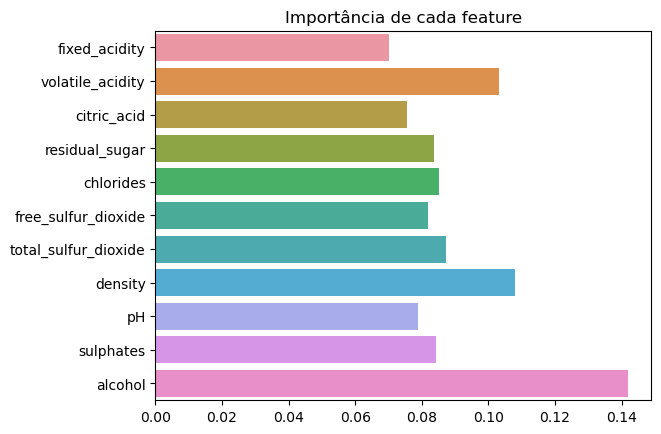

In [28]:
#Plota um gráfico que demonstre as features mais importantes da random forest 
#Quanto mais importante uma feature, mais na copa da árvore ela estará
nomes_features = winequality_dataset.iloc[:, 0:11].columns
importancia = pd.Series(data=random_forest.feature_importances_, index=nomes_features)
sns.barplot(x=importancia, y=importancia.index, orient='h').set_title('Importância de cada feature')

Aplicando algoritmo de oversampling para tentar aumentar a quantidade de dados de algumas qualidades 

In [29]:
from imblearn.over_sampling import SMOTE

#Separa o dataset em características e rótulos(targets)
x = winequality_dataset.iloc[:, 0:11]
y = winequality_dataset.iloc[:, 11]

#Defino que as tenho 4 classes consideradas como menores
smote = SMOTE(k_neighbors = 4)

#Realizo uma reamostragem do dataset
x_resampleado, y_resampleado = smote.fit_resample(x, y)

In [30]:
#Realizo uma nova separação do dataset após a reamostragem
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x_resampleado, y_resampleado, random_state=0, test_size=0.2)

In [31]:
# Treinar o modelo Random Forest usando os dados resampleados
random_forest.fit(x_treinamento, y_treinamento)

# Fazer previsões no conjunto de teste
y_pred = random_forest.predict(x_teste)

# Avaliar o desempenho do modelo com acurácia, f1-score, recall e precision
cv_scores = cross_val_score(random_forest, x_treinamento, y_treinamento, cv=5)
print("Desempenho do modelo (validação cruzada):")
print(f'Acurácia média: {(np.mean(cv_scores)*100):.1f}%')
print(f'Desvio padrão: {np.std(cv_scores):.2f}')

Desempenho do modelo (validação cruzada):
Acurácia média: 87.5%
Desvio padrão: 0.00
